# Hodgkin-Huxley equations
Simulating the equations and understanding them using numerical methods (computing V, m, n and h for every delta_t change in time)

In [136]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# defining functions for getting rate constant and infinity values etc.
# functional relation for alpha and beta with voltage is taken from wikipedia

def alpha_n(volt):
    #alpha_n in function of voltage, potassium channel constant
    return 0.01 * (10 - volt) / (np.exp((10.0 - volt) / 10.0) - 1.0)

def beta_n(volt):
    #beta_n in function of voltage, potassium channel constant
    return 0.125 * np.exp(-volt / 80.0)

def alpha_m(volt):
    #alpha_m in function of voltage, sodium channel constant
    return 0.1 * (25.0 - volt) / (np.exp((25.0 - volt) / 10.0) - 1.0)

def beta_m(volt):
    #beta_m in function of voltage, sodium channel constant
    return 4.0 * np.exp(-volt / 18.0)

def alpha_h(volt):
    #alpha_h in function of voltage, sodium channel constant
    return 0.07 * np.exp(-volt / 20.0)

def beta_h(volt):
    #beta_h in function of voltage, sodium channel constant
    return 1.0 / (np.exp((30.0 - volt) / 10.0) + 1.0)

def x_tau(alpha_x, beta_x):
    #this method calculates the time constant tau for a certain ion channel.
    return 1.0 / (alpha_x + beta_x)

def x_inf(alpha_x, beta_x):
    #this method calculates the stationary constant x_inf for a certain ion channel.
    return alpha_x / (alpha_x + beta_x)

def injected_current(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    elif 20.0 < t < 21.0:
        return 25.0
    return 0.0

In [138]:
T = 40 # total time
delta_t =0.001  # time interval
N = int(T/delta_t)+1 # total number of points
t = np.linspace(0,T,N)
v = np.zeros(N,dtype=np.float64)
m = np.zeros(N,dtype=np.float64)
n = np.zeros(N,dtype=np.float64)
h = np.zeros(N,dtype=np.float64)

v[0] = -75.0  # voltage in (mV)  
n[0] = 0.1
m[0] = 0.0
h[0] = 1.0

Cm = 1.0   # membrane capacitance (in µF/cm^2)
g_na_max = 120.0 # max sodium channel specific conductance (in mS/cm^2)
g_k_max = 36.0 # max potassium channel specific conductance (in mS/cm^2)
g_l = 0.3 # max leaky channel specific conductance (in mS/cm^2)

E_na = 50.0 # sodium resting potential (in mV)
E_k = -70.0 # potassium resting potential (in mV)
E_l =10.63 # leak potential

I_inj = np.zeros(N,dtype=np.float64)
I_ion = np.zeros(N,dtype=np.float64) 
I_na = np.zeros(N,dtype=np.float64)
I_k = np.zeros(N,dtype=np.float64)

I_ion[0]=0
I_na[0]=0
I_k[0]=0

tau_m = np.zeros(N,dtype=np.float64)
tau_n = np.zeros(N,dtype=np.float64)
tau_h = np.zeros(N,dtype=np.float64)
m_inf = np.zeros(N,dtype=np.float64)
n_inf = np.zeros(N,dtype=np.float64)
h_inf = np.zeros(N,dtype=np.float64)

#### Computing values of V, m, n and h with change in time

In [139]:
for i in range(1,N):
    I_inj[i] =injected_current(t[i])  # injected current at time t

    v[i] = v[i-1] +((delta_t*(I_inj[i] - I_ion[i-1]))/Cm)
    tau_m[i]=x_tau(alpha_m(v[i]),beta_m(v[i]))
    m_inf[i]=x_inf(alpha_m(v[i]),beta_m(v[i]))

    tau_n[i]=x_tau(alpha_n(v[i]),beta_n(v[i]))
    n_inf[i]=x_inf(alpha_n(v[i]),beta_n(v[i]))

    tau_h[i]=x_tau(alpha_h(v[i]),beta_h(v[i]))
    h_inf[i]=x_inf(alpha_h(v[i]),beta_h(v[i]))
    
    # Calculating m,n,h using alpha, beta only
    # m[i] = m[i-1] + delta_t*(alpha_m(v[i-1])*(1-m[i-1])-beta_m(v[i-1])*m[i-1])
    # n[i] = n[i-1] + delta_t*(alpha_n(v[i-1])*(1-n[i-1])-beta_n(v[i-1])*n[i-1])
    # h[i] = h[i-1] + delta_t*(alpha_h(v[i-1])*(1-h[i-1])-beta_h(v[i-1])*h[i-1])

    # Calculating m,n,h using infinity values and rate constant(tau)
    m[i] = m[i-1] + delta_t*((m_inf[i]-m[i-1])/tau_m[i])
    n[i] = n[i-1] + delta_t*((n_inf[i]-n[i-1])/tau_n[i])
    h[i] = h[i-1] + delta_t*((h_inf[i]-h[i-1])/tau_h[i])
    
    
    I_na[i] = np.power(m[i],3)*h[i]*g_na_max*(v[i]-E_na)
    I_k[i] =np.power(n[i],4)*g_k_max*(v[i]-E_k)
    I_ion[i] = I_na[i] + I_k[i] + g_l*(v[i]-E_l)

In [140]:
# approximating values of infinity and tau at time=0 to time=delta_t just to avoid confusion in graphs
m_inf[0] = m_inf[1]
n_inf[0] = n_inf[1]
h_inf[0] = h_inf[1]    

tau_m[0] = tau_m[1]
tau_n[0] = tau_n[1]
tau_h[0] = tau_h[1]    

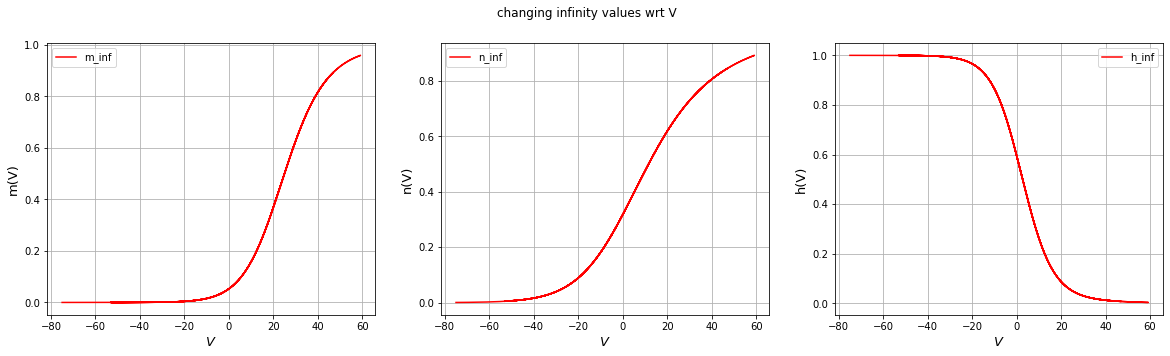

In [141]:
#ploting
f,ax = plt.subplots(1,3,figsize=(20,5))
f.suptitle('changing infinity values wrt V')
ax[0].plot(v,m_inf,'r',label ='m_inf')
ax[0].set_xlabel('$V$',fontsize=13)
ax[0].set_ylabel('m(V)',fontsize=13)
ax[0].grid()
ax[0].legend()
ax[1].plot(v,n_inf,'r',label ='n_inf')
ax[1].set_xlabel('$V$',fontsize=13)
ax[1].set_ylabel('n(V)',fontsize=13)
ax[1].grid()
ax[1].legend()
ax[2].plot(v,h_inf,'r',label ='h_inf')
ax[2].set_xlabel('$V$',fontsize=13)
ax[2].set_ylabel('h(V)',fontsize=13)
ax[2].grid()
ax[2].legend()

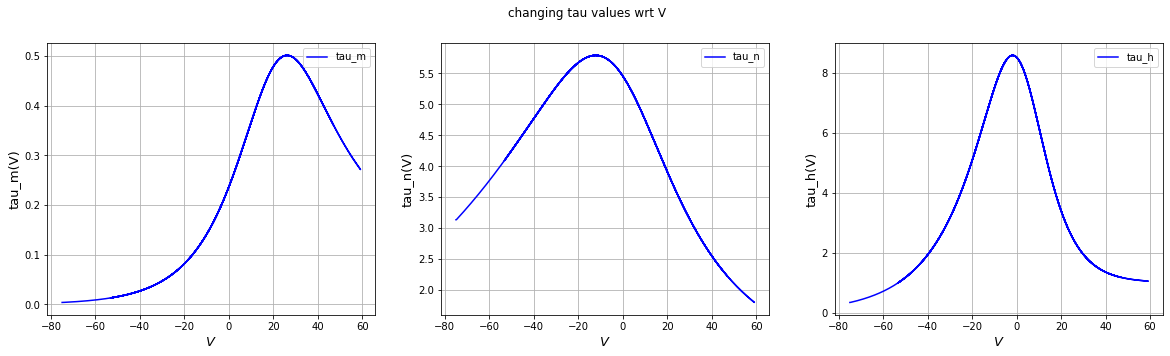

In [142]:
#ploting
f,ax = plt.subplots(1,3,figsize=(20,5))
f.suptitle('changing tau values wrt V')
ax[0].plot(v,tau_m,'b',label ='tau_m')
ax[0].set_xlabel('$V$',fontsize=13)
ax[0].set_ylabel('tau_m(V)',fontsize=13)
ax[0].grid()
ax[0].legend()
ax[1].plot(v,tau_n,'b',label='tau_n')
ax[1].set_xlabel('$V$',fontsize=13)
ax[1].set_ylabel('tau_n(V)',fontsize=13)
ax[1].grid()
ax[1].legend()
ax[2].plot(v,tau_h,'b',label ='tau_h')
ax[2].set_xlabel('$V$',fontsize=13)
ax[2].set_ylabel('tau_h(V)',fontsize=13)
ax[2].grid()
ax[2].legend()

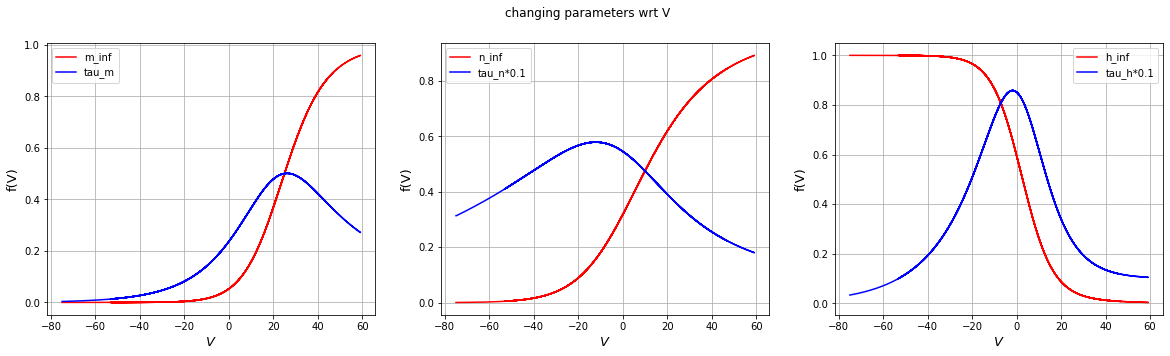

In [143]:
#ploting
f,ax = plt.subplots(1,3,figsize=(20,5))
f.suptitle('changing parameters wrt V')
ax[0].plot(v,m_inf,'r',label ='m_inf')
ax[0].plot(v,tau_m,'b',label ='tau_m')
ax[0].set_xlabel('$V$',fontsize=13)
ax[0].set_ylabel('f(V)',fontsize=13)
ax[0].grid()
ax[0].legend()
ax[1].plot(v,n_inf,'r',label ='n_inf')
ax[1].plot(v,tau_n*0.1,'b',label='tau_n*0.1')
ax[1].set_xlabel('$V$',fontsize=13)
ax[1].set_ylabel('f(V)',fontsize=13)
ax[1].grid()
ax[1].legend()
ax[2].plot(v,h_inf,'r',label ='h_inf')
ax[2].plot(v,tau_h*0.1,'b',label ='tau_h*0.1')
ax[2].set_xlabel('$V$',fontsize=13)
ax[2].set_ylabel('f(V)',fontsize=13)
ax[2].grid()
ax[2].legend()

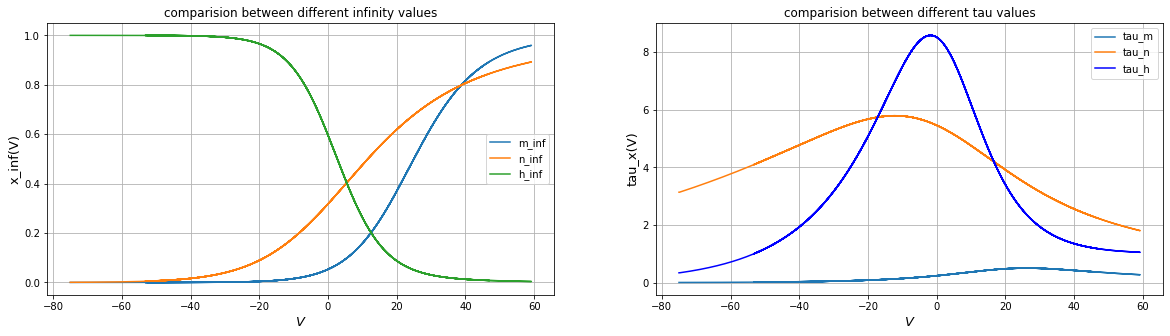

In [144]:
#ploting
f,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(v,m_inf,label ='m_inf')
ax[0].plot(v,n_inf,label ='n_inf')
ax[0].plot(v,h_inf,label ='h_inf')
ax[0].set_title('comparision between different infinity values')
ax[0].set_xlabel('$V$',fontsize=13)
ax[0].set_ylabel('x_inf(V)',fontsize=13)
ax[0].grid()
ax[0].legend()
ax[1].plot(v,tau_m,label ='tau_m')
ax[1].plot(v,tau_n,label='tau_n')
ax[1].plot(v,tau_h,'b',label ='tau_h')
ax[1].set_title('comparision between different tau values')
ax[1].set_xlabel('$V$',fontsize=13)
ax[1].set_ylabel('tau_x(V)',fontsize=13)
ax[1].grid()
ax[1].legend()

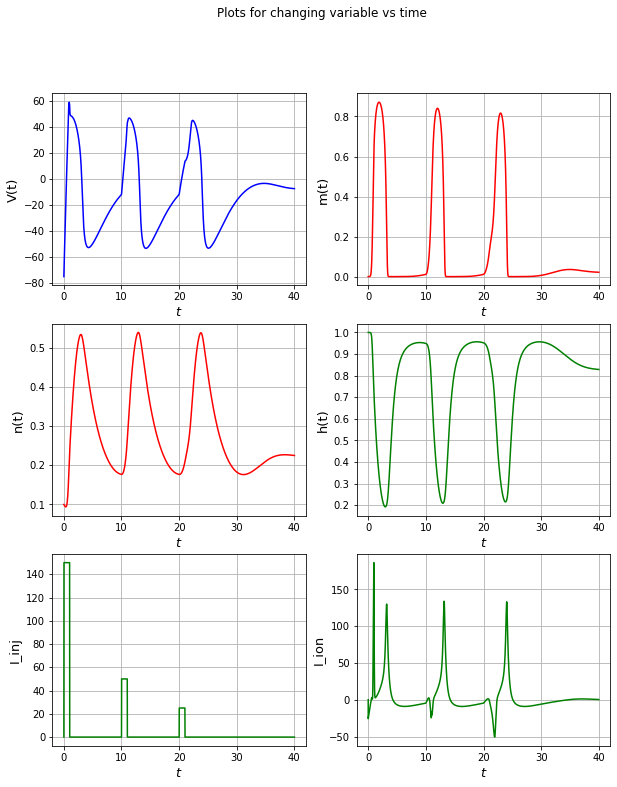

In [145]:
#ploting
f,ax = plt.subplots(3,2,figsize=(10,12))
f.suptitle('Plots for changing variable vs time')
ax[0,0].plot(t,v,'b')
ax[0,0].set_xlabel('$t$',fontsize=13)
ax[0,0].set_ylabel('V(t)',fontsize=13)
ax[0,0].grid()
ax[0,1].plot(t,m,'r')
ax[0,1].set_xlabel('$t$',fontsize=13)
ax[0,1].set_ylabel('m(t)',fontsize=13)
ax[0,1].grid()
ax[1,0].plot(t,n,'r');
ax[1,0].set_xlabel('$t$',fontsize=13);
ax[1,0].set_ylabel('n(t)',fontsize=13);
ax[1,0].grid()
ax[1,1].plot(t,h,'g')
ax[1,1].set_xlabel('$t$',fontsize=13)
ax[1,1].set_ylabel('h(t)',fontsize=13)
ax[1,1].grid()
ax[2,0].plot(t,I_inj,'g')
ax[2,0].set_xlabel('$t$',fontsize=13)
ax[2,0].set_ylabel('I_inj',fontsize=13)
ax[2,0].grid()
ax[2,1].plot(t,I_ion,'g')
ax[2,1].set_xlabel('$t$',fontsize=13)
ax[2,1].set_ylabel('I_ion',fontsize=13)
ax[2,1].grid()

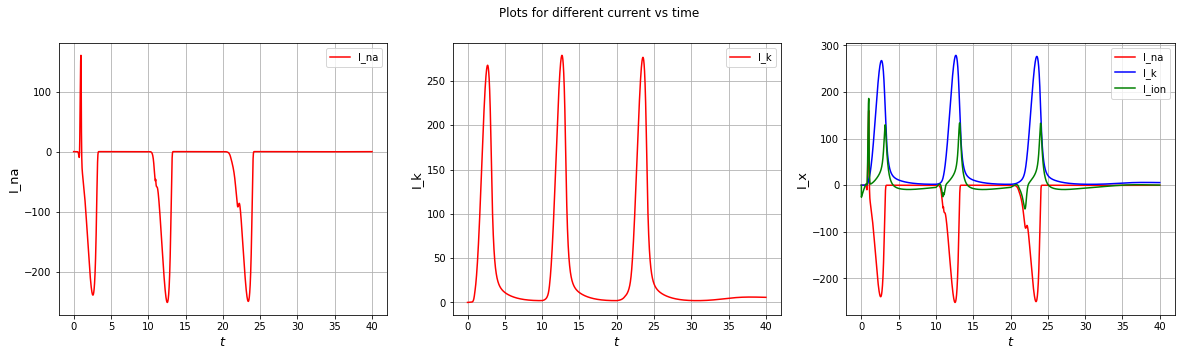

In [146]:
#ploting
f,ax = plt.subplots(1,3,figsize=(20,5))
f.suptitle('Plots for different current vs time')
ax[0].plot(t,I_na,'r',label ='I_na')
ax[0].set_xlabel('$t$',fontsize=13)
ax[0].set_ylabel('I_na',fontsize=13)
ax[0].grid()
ax[0].legend()
ax[1].plot(t,I_k,'r',label ='I_k')
ax[1].set_xlabel('$t$',fontsize=13)
ax[1].set_ylabel('I_k',fontsize=13)
ax[1].grid()
ax[1].legend()
ax[2].plot(t,I_na,'r',label ='I_na')
ax[2].plot(t,I_k,'b',label ='I_k')
ax[2].plot(t,I_ion,'g',label ='I_ion')
ax[2].set_xlabel('$t$',fontsize=13)
ax[2].set_ylabel('I_x',fontsize=13)
ax[2].grid()
ax[2].legend()